### Mini Project : Diabetics Prediction Using Supervised Learning ( Machine Learning )

### Work Flow :

1. Read Data
2. Preprocess Data and Normalize / Standardize
3. Split Train and Test Data
4. Train Model / Algorithm
5. Test Model using Test data
6. Confusion Matrix , Check Accuracy and MSE

#### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

####  Import Dataset

In [2]:
dataset = pd.read_csv("diabetes.csv")
print(" Data Imported Successfully!!!!!!!!!!!!!!!!")

 Data Imported Successfully!!!!!!!!!!!!!!!!


## 1. READ DATA
#### Check Details of the dataset:

1. Shape
2. Descriptive Statistics
3. Data types , Null values and Duplicate 
4. Group by Results
5. Correlation between attributes

In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print(" Null values in Each Columns :")

dataset.isnull().sum()

 Null values in Each Columns :


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
print(" Duplicate values in Dataset :")

dataset.duplicated().sum()

 Duplicate values in Dataset :


0

In [8]:
print(" 1 : Positive to Diabeties | 0 : Negative to Diabeties")

dataset.groupby("Outcome").size()

 1 : Positive to Diabeties | 0 : Negative to Diabeties


Outcome
0    500
1    268
dtype: int64

In [9]:
dataset_corr = dataset.corr()

In [10]:
dataset_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


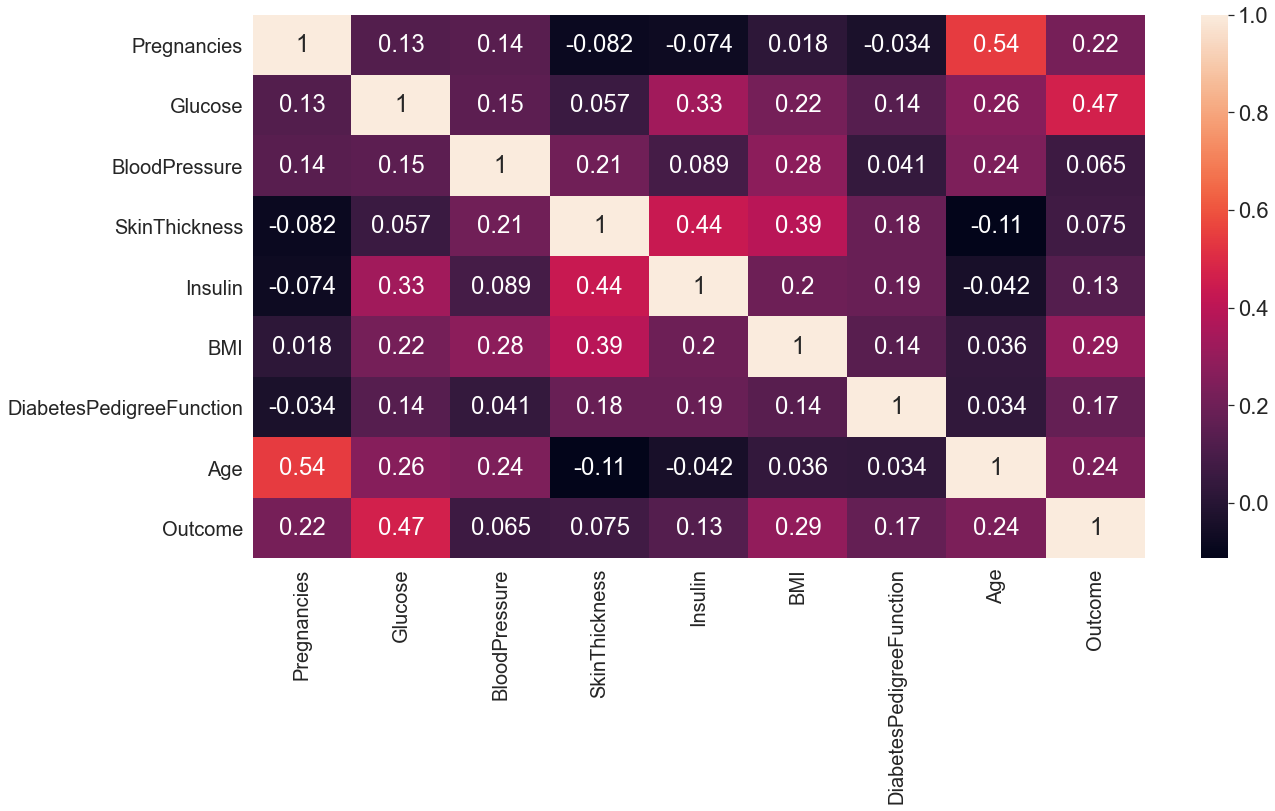

In [11]:
plt.figure(figsize=(20,10))
sns. set(font_scale=2)

sns.heatmap(dataset_corr, annot=True)
plt.xticks(fontsize = 20 ,rotation = "vertical")
plt.yticks(fontsize = 20 ,rotation = "horizontal")
plt.show()

### Above Coorelation shows with outcomes , Glucose (47%), BMI (29%) , Age (24%) , Preganancies (22%) are highly correlated.

## 2. Preprocess Data and  Standardize

In [12]:
X = dataset.drop("Outcome" ,axis =1)
y = dataset["Outcome"]

In [13]:
X.shape , y.shape

((768, 8), (768,))

In [14]:
pd.DataFrame(X)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()


In [16]:
X = std.fit_transform(X)

In [17]:
X.shape , X

((768, 8),
 array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
          0.46849198,  1.4259954 ],
        [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
         -0.36506078, -0.19067191],
        [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
          0.60439732, -0.10558415],
        ...,
        [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
         -0.68519336, -0.27575966],
        [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
         -0.37110101,  1.17073215],
        [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
         -0.47378505, -0.87137393]]))

## 3. Split Train and Test Data

In [18]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train ,y_test = train_test_split(X,y, test_size= 0.2 ,stratify=y,random_state= 2)

In [19]:
X_train.shape ,X_test.shape , y_train.shape ,y_test.shape

((614, 8), (154, 8), (614,), (154,))

## 4. Train Model / Algorithm

In [20]:
from sklearn import svm
clf = svm.SVC(kernel="linear")
clf.fit(X_train ,y_train)

SVC(kernel='linear')

## 5. Test Model using Test data

In [21]:
pred = clf.predict(X_test)

In [22]:
pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

## 6. Confusion Matrix ,Check Accuracy and MSE

#### Accuracy of Training set

In [23]:
X_train_pred = clf.predict(X_train)

In [24]:
from sklearn.metrics import accuracy_score
print('Accuracy score of training data is  : ',accuracy_score(X_train_pred ,y_train)*100 ,"%")

Accuracy score of training data is  :  78.66449511400651 %


#### Accuracy of Testing set

In [25]:
X_test_pred = clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy score of testing data is  : ',accuracy_score(X_test_pred ,y_test)*100 ,"%")

Accuracy score of testing data is  :  77.27272727272727 %


#### Accuracy of Model

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy score of model is  : ',accuracy_score(y_test ,pred)*100 ,"%")

Accuracy score of model is  :  77.27272727272727 %


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[91,  9],
       [26, 28]], dtype=int64)

In [29]:
from sklearn.metrics import mean_squared_error
print(" MSE odf model is : " , mean_squared_error(y_test,pred))

 MSE odf model is :  0.22727272727272727


### Making Predicitve System

In [34]:
#input_data = (5,166,72,19,175,25.8,0.587,51) # 1
#input_data = (1,85,66,29,0,26.6,0.351,31) # 0

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = std.transform(input_data_reshaped)
print(std_data)

prediction = clf.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


In [31]:
print('Here is the First task of Supervised learning (SVM) is Completed')
print('---------------------------------------------')
print('Thank you')

Here is the First task of Supervised learning (SVM) is Completed
---------------------------------------------
Thank you
